# Enseignement d'Intégration  - Doctolib #

Notebook for the EI of the ST4 at CentraleSupélec. We want to use the data given by Doctolib on their patients to be able to predict if a new patient is going to be present or absent

## Introductory code ##

### Importing Libraries ###

In [538]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error, precision_recall_curve
from sklearn.metrics import f1_score, average_precision_score, balanced_accuracy_score, precision_score, recall_score
import seaborn as sns
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

### Reading Data ###

Here we want to read a part of the csv given and maybe plot a few variables

In [539]:
filename = "encoded_data_all.csv"
df = pd.read_csv(filename, low_memory=False)
data = df
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data.head(5)

,online_booking,delay_in_days,patient_appt_number,previous_noshow,appt_duration,received_reminder_sms,zipcode,no_show,['patient_age_group']_0-17,['patient_age_group']_18-24,...,['region']_LORRAINE,['region']_La Reunion,['region']_MIDI-PYRENEES,['region']_Monaco,['region']_NORD-PAS-DE-CALAIS,['region']_PAYS DE LA LOIRE,['region']_PICARDIE,['region']_POITOU-CHARENTES,['region']_PROVENCE-ALPES-COTE D'AZUR,['region']_RHONE-ALPES
0,1,6,13,0,45,1,92,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,57,2,0,90,1,69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,5,1,0,80,1,94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,11,3,0,20,1,94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,1,0,40,1,13,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Random Forest ##

Try to clasify patients using random forest with different weights. The no shows are a minoritary class

### Ratio of No Shows ###

In [540]:
print("Number of no shows: ", len(data.loc[data["no_show"] == 1]))
print("Number of shows: ", len(data.loc[data["no_show"] == 0]))
print("Ratio: {:.2f}%".format(100*(len(data.loc[data["no_show"] == 1])/len(data.loc[data["no_show"] == 0]))))

Number of no shows:  227373
Number of shows:  3011739
Ratio: 7.55%


### Separating Test and Train sets ###

In [556]:
features = list(data.columns)
features.remove('no_show')

y = data['no_show']
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

### Evaluating parameters for the RF ###

We will use cross-validation to find the best weight, depth and number of estimators for the RF

## Performance Evaluation ##

For the RF we want to plot the confusion matrix, the ROC curve and see training and test errors

In [565]:
# rf_classifier = RandomForestClassifier()
# cross_validation = ShuffleSplit(test_size = 0.2)

# clf = GridSearchCV(estimator = rf_classifier,
#                    param_grid = {'n_estimators': [10, 20],
#                                  'max_depth': [5, 10, 20, 25],
#                                  'class_weight': [{0:1, 1:1}, {0:1, 1:10}, {0:1, 1:25}]},
#                    scoring = ‘f1_weighted’,
#                    cv = cross_validation)

clf = RandomForestClassifier(n_estimators = 20, max_depth = 23, class_weight = {0:1, 1:25})
params = clf.get_params

clf.fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

print('Random Forest Parameters')
print(params)

Random Forest Parameters
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 25},
            criterion='gini', max_depth=23, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)>


### Feature Importance ###

[]

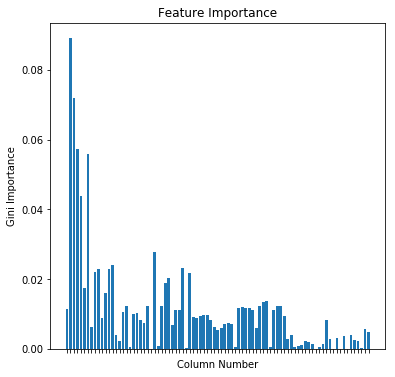

In [566]:
feature_importance = clf.feature_importances_
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.bar(X.columns, feature_importance)
ax.set_title('Feature Importance')
ax.set_xlabel('Column Number')
ax.set_ylabel('Gini Importance')
ax.set_xticklabels([])

In [567]:
N = 15
important_features_values = pd.Series(feature_importance).sort_values(ascending = False).iloc[:N]
important_features_index = list(N_most_important_features.index.values)
important_features = []
important_features_values

1     0.089082
2     0.072057
3     0.057278
6     0.055732
4     0.043721
25    0.027771
13    0.024118
33    0.023131
9     0.022870
12    0.022797
8     0.022163
35    0.021788
29    0.020252
28    0.018982
5     0.017531
dtype: float64

In [568]:
X.columns

Index(['online_booking', 'delay_in_days', 'patient_appt_number',
       'previous_noshow', 'appt_duration', 'received_reminder_sms', 'zipcode',
       '['patient_age_group']_0-17', '['patient_age_group']_18-24',
       '['patient_age_group']_25-34', '['patient_age_group']_35-44',
       '['patient_age_group']_45-54', '['patient_age_group']_55-64',
       '['patient_age_group']_65+', '['visit_motive_name']_Autre',
       '['visit_motive_name']_Bilan',
       '['visit_motive_name']_Consultation & suivi',
       '['visit_motive_name']_Extraction & chirurgie',
       '['visit_motive_name']_Orthodonthie',
       '['visit_motive_name']_Pose & prothèse',
       '['visit_motive_name']_Première consultation',
       '['visit_motive_name']_Soins légers', '['visit_motive_name']_Urgence',
       '['organization_type']_Practice', '['organization_type']_Radiology',
       '['organization_type']_Salaried establishment',
       '['organization_type']_Self-employed establishment',
       '['organizatio

### Confusion Matrix ###

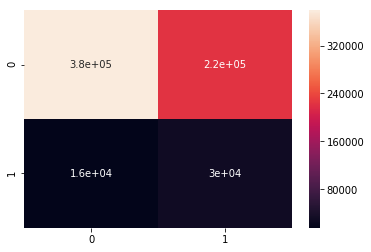

In [569]:
CM = confusion_matrix(y_test, y_test_hat)
sns.heatmap(CM, annot=True)

### Performance Measures ###

In [570]:
recall = CM[1,1]/(CM[1,0]+CM[1,1]) # tp/(tp+fn)
precision = CM[1,1]/(CM[0,1]+CM[1,1]) # # tp/(tp+fp)
tnr = CM[0,0]/(CM[0,1]+CM[0,0]) # tn/(tn+fp) Acc-
tpr = recall # Acc+

f_measure = 2*precision*recall/(precision+recall)
g_mean = (tpr*tnr) ** 0.5
weighted_accuracy = 0.5 * tnr + 0.5 * tpr


print('True Negative Rate (Acc-): {:.2f}%'.format(100*tnr))
print('True Positive Rate (Acc+): {:.2f}%'.format(100*tpr))
print('G-Mean: {:.2f}%'.format(100*g_mean))
print('Weighted Accuracy: {:.2f}%'.format(100*weighted_accuracy))
print('Precision: {:.2f}%'.format(100*precision))
print('Recall: {:.2f}%'.format(100*recall))
print('F-measure: {:.2f}%'.format(100*f_measure))

True Negative Rate (Acc-): 62.88%
True Positive Rate (Acc+): 65.85%
G-Mean: 64.35%
Weighted Accuracy: 64.36%
Precision: 11.82%
Recall: 65.85%
F-measure: 20.04%


### ROC Curve ###

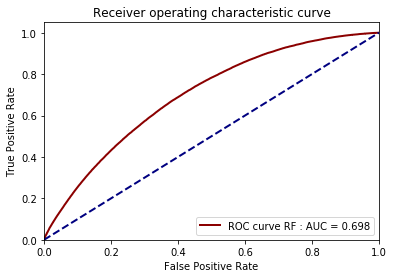

In [571]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
area=auc(fpr,tpr)
fig=plt.figure()
lw = 2
plt.plot(fpr,tpr,color="darkred", lw=lw, label="ROC curve RF : AUC = {:.3f}".format(area))
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")

### Precision Recall Curve ###

Text(0.5, 1.0, 'Precision-Recall Curve')

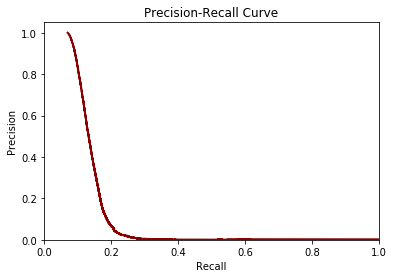

In [572]:
prec, rec, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
fig=plt.figure()
plt.plot(prec, rec ,color="darkred", lw=2, label="Precision-Recall Curve RF")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")